In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *

import plotly.express as px
import pandas as pd
import pickle

In [2]:
# local imports
from modules.mesh_utils import get_mesh
from modules.physics_utils import get_VandE, compute_trajectory, coord_impact, intersection
#from modules.plotting_utils import ?

# Defining parameters

In [3]:
mesh_dict = { # we need L_mot-L_1 < 2*l_mot !
    'L_mot' : .01,
    'l_mot' : .007,
    'L_1' : .0045,
    'l_1': .005,
    'L_2' : .007,
    'l_2' : .015,
    'delta_vert_12' : .005,
    'L_vacuum' : .1,
    'l_vacuum': .05,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,
    'M_NUCLEON':1.7e-27,
}

integration_parameters_dict = {
    'tmax' : .00001,
    'dt' : .0000001,
}

injection_dict = {
    'Nombre de particules':10,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
}

mode_dict={
    'Elastique?':True,
    'Transfert de charge?':True,
    'Contact inter particules?':False,
    'perte u par contact':0.05,
    'proba perte q par contact':0.4,
}

# Creating mesh

In [4]:
# using local import to create the mesh
mesh, segments_list, zone = get_mesh(mesh_dict)

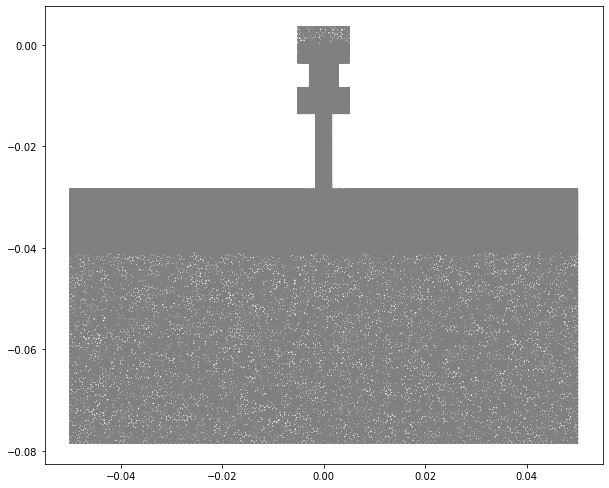

In [5]:
plt.figure(figsize=(10,10))
plot(mesh)
plt.show()

# E and V computations

In [7]:
# E computation
# We use functions defined in the *physics_utils.py* module.
Phi, E = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

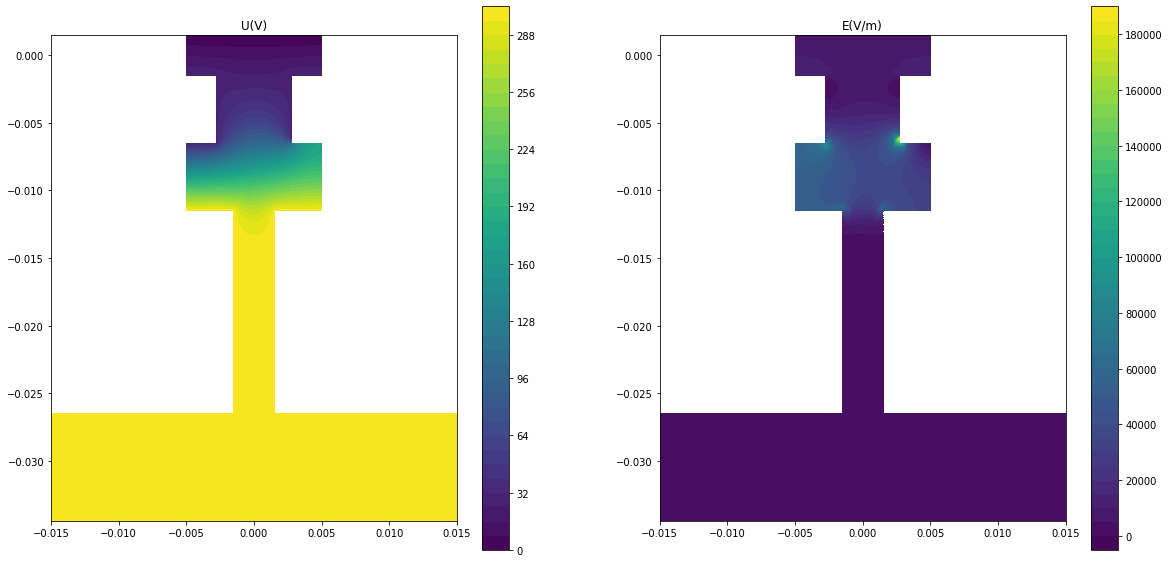

In [20]:
borne_inf_x=-1.5*mesh_dict['L_mot']
borne_sup_x=1.5*mesh_dict['L_mot']
borne_inf_y=-1.3*(.5*mesh_dict['l_mot']+mesh_dict['l_1']+mesh_dict['l_2']+mesh_dict['delta_vert_12'])
borne_sup_y=.5*mesh_dict['l_mot']

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
fig=plot(Phi)
plt.title('U(V)')
fig.set_cmap("viridis") 
plt.colorbar(fig)
plt.xlim(borne_inf_x,borne_sup_x)
plt.ylim(borne_inf_y,borne_sup_y)

plt.subplot(1,2,2)
fig=plot(NE)
plt.title('E(V/m)')
fig.set_cmap("viridis") 
plt.colorbar(fig)
plt.xlim(borne_inf_x,borne_sup_x)
plt.ylim(borne_inf_y,borne_sup_y)

plt.show()

# Some simulations

In [22]:
details=True

if details==True:
    liste_pf, liste_alpha, liste_alpha_sigma, liste_V, liste_V_sigma, listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone, E, physics_consts_dict, details)
    
if details==False:
    liste_pf, liste_alpha, liste_alpha_sigma, liste_V, liste_V_sigma = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone,E, physics_consts_dict, details)


début d'initialisation
début de l'injection
toutes les particules sont injectées
Avancement de 5.0%, 0 particules sorties
Avancement de 31.99999999999997%, 2 particules sorties
Avancement de 67.99999999999994%, 8 particules sorties
fin du calcul, critère d'arret: Nb_out
début traitement de données


In [26]:
if details==True:
    plt.figure(figsize=(20,20))
    fig=plot(NE)
    for i in range (injection_dict['Nombre de particules']):
        plt.plot(listes_x[i],listes_y[i],linestyle='-',color='r')
        plt.scatter(listes_x[i][0],listes_y[i][0],color='r')
        plt.scatter(listes_x[i][-1],listes_y[i][-1],color='r')
    plt.title('E (V/m)', size=35)
    plt.xlabel('x (m)',size=10)
    plt.ylabel('y (m)',size=10)
    fig.set_cmap("viridis")
    plt.colorbar(fig)
    plt.show()

In [ ]:
print('proportions finales de I,I+,I- = ',liste_pf)
print("proportions finales de l'angle de la vitesse de I,I+,I- = ",liste_alpha)
print('proportions finales de la norme de la vitesse 2D de I,I+,I- = ',liste_V)

# Let's optimize

In [4]:
liste_proba=[1]
liste_l_1=[.005]
liste_l_2=[.009,.013,.017,.021,.025,0.029,0.033,0.037]
liste_L_1=[.0045]
liste_L_2=[.003,.004,.005,.006,.007,.008,.009]
liste_Phi_electrode1=[30]
liste_Phi_electrode2=[300,100,500]

In [8]:

liste_param_testes=[]
listes_pf=[]
listes_alpha=[]
listes_alpha_sigma=[]
listes_V=[]
listes_V_sigma=[]


In [6]:
"""with open("param_testes.txt", "rb") as fp:
    liste_param_testes = pickle.load(fp)
with open("pf.txt", "rb") as fp:
    listes_pf = pickle.load(fp)
with open("alpha.txt", "rb") as fp:
    listes_alpha = pickle.load(fp)
with open("alpha_sigma.txt", "rb") as fp:
    listes_alpha_sigma = pickle.load(fp)
with open("V.txt", "rb") as fp:
    listes_V = pickle.load(fp)
with open("V_sigma.txt", "rb") as fp:
    listes_V_sigma = pickle.load(fp)"""

'with open("param_testes.txt", "rb") as fp:\n    liste_param_testes = pickle.load(fp)\nwith open("pf.txt", "rb") as fp:\n    listes_pf = pickle.load(fp)\nwith open("alpha.txt", "rb") as fp:\n    listes_alpha = pickle.load(fp)\nwith open("alpha_sigma.txt", "rb") as fp:\n    listes_alpha_sigma = pickle.load(fp)\nwith open("V.txt", "rb") as fp:\n    listes_V = pickle.load(fp)\nwith open("V_sigma.txt", "rb") as fp:\n    listes_V_sigma = pickle.load(fp)'

In [9]:
integration_parameters_dict = {
    'tmax' : .00005,
    'dt' : .00000001,
}

injection_dict = {
    'Nombre de particules':100,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
}

physics_consts_dict = {
    'rhoelec': 0,
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,
    'M_NUCLEON':1.7e-27,
}

for Phi_electrode1 in liste_Phi_electrode1:
    for l_1 in liste_l_1:
        for L_1 in liste_L_1:
            for p in liste_proba :
                for Phi_electrode2 in liste_Phi_electrode2:
                    for l_2 in liste_l_2:
                        for L_2 in liste_L_2:
                            
                            param=[p, l_1, l_2, L_1, L_2, Phi_electrode1, Phi_electrode2]
                            
                            if param in liste_param_testes:
                                print('combinaison '+str(param)+' déjà testée')
                                break
                                
                            mode_dict={
                                'Elastique?':False,
                                'Transfert de charge?':True,
                                'Contact inter particules?':False,
                                'perte u par contact':0.1,
                                'proba perte q par contact':p,
                            }
    
                            mesh_dict = {
                                'L_mot' : .01,
                                'l_mot' : .003,
                                'L_1' : L_1,
                                'l_1': l_1,
                                'L_2' : L_2,
                                'l_2' : l_2,
                                'delta_vert_12' : .005,
                                'L_vacuum' : .1,
                                'l_vacuum': .05,
                                'mesh_resolution' : 100,
                                'refine_mesh' : True,
                            }

                            phi_dict = {
                                'Phi_top_mot' : 0,
                                'Phi_bord_mot': 'N',
                                'Phi_electrode1' :Phi_electrode1,
                                'Phi_inter_electrode':'N',
                                'Phi_electrode2':Phi_electrode2,
                                'Phi_sup_vacuum':'N',
                                'Phi_inf_vacuum':'N',
                            }
            
                            mesh, segments_list, zone = get_mesh(mesh_dict)
                            Phi, E = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)

                            liste_pf, liste_alpha, liste_alpha_sigma, liste_V, liste_V_sigma = \
                            compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone,E, physics_consts_dict, False)
    
                            listes_pf.append(liste_pf)
                            listes_alpha.append(liste_alpha)
                            listes_alpha_sigma.append(liste_alpha_sigma)
                            listes_V.append(liste_V)
                            listes_V_sigma.append(liste_V_sigma)
                            liste_param_testes.append(param)
                    
                            print('combinaison '+str(param)+' testée')
                            print('------------------------------------------------------')


début d'initialisation
début de l'injection
Avancement de 0%, 0 particules sorties
toutes les particules sont injectées
Avancement de 0%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 1%, 0 particules sorties
Avancement de 2%, 0 particules sorties
Avancement de 2%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 3%, 0 particules sorties
Avancement de 4%, 0 particules sorties
Avancement de 4%, 0 particules sorties
Avancement de 4%, 0 particules sorties
Avancement de 5%, 0 particules sorties
Avancement de 5%, 0 particules sorties
Avancement de 5%, 0 particules sorties
Avancement de 5%, 0 particules sorties
Avancement de 6%, 1 pa

KeyboardInterrupt: 

In [24]:
with open("param_testes.txt", "wb") as fp:
    pickle.dump(liste_param_testes, fp)
with open("pf.txt", "wb") as fp:
    pickle.dump(listes_pf, fp)
with open("alpha.txt", "wb") as fp:
    pickle.dump(listes_alpha, fp)
with open("alpha_sigma.txt", "wb") as fp:
    pickle.dump(listes_alpha_sigma, fp)
with open("V.txt", "wb") as fp:
    pickle.dump(listes_V, fp)
with open("V_sigma.txt", "wb") as fp:
    pickle.dump(listes_V_sigma, fp)

In [10]:
df = pd.DataFrame(dict(
    proba=np.array(liste_param_testes)[:,0],
    l_1=np.array(liste_param_testes)[:,1],
    l_2=np.array(liste_param_testes)[:,2],
    L_1=np.array(liste_param_testes)[:,3],
    L_2=np.array(liste_param_testes)[:,4],
    Phi_electrode_1=np.array(liste_param_testes)[:,5],
    Phi_electrode_2=np.array(liste_param_testes)[:,6],
    
    pf1=np.array(listes_pf)[:,0],
    pf2=np.array(listes_pf)[:,1],
    pf3=np.array(listes_pf)[:,2],
    alpha1=np.array(listes_alpha)[:,0],
    alpha2=np.array(listes_alpha)[:,1],
    alpha3=np.array(listes_alpha)[:,2],
    sigma_alpha1=np.array(listes_alpha_sigma)[:,0],
    sigma_alpha2=np.array(listes_alpha_sigma)[:,1],
    sigma_alpha3=np.array(listes_alpha_sigma)[:,2],
    Vnorm1=np.array(listes_V)[:,0],
    Vnorm2=np.array(listes_V)[:,1],
    Vnorm3=np.array(listes_V)[:,2],
    sigma_Vnorm1=np.array(listes_V_sigma)[:,0],
    sigma_Vnorm2=np.array(listes_V_sigma)[:,1],
    sigma_Vnorm3=np.array(listes_V_sigma)[:,2],
    
    rapport2=np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4],
    rapport1=np.array(liste_param_testes)[:,1]/np.array(liste_param_testes)[:,3]
))

In [11]:
liste_couleur=[]
for p in liste_param_testes:
    if p[6]==300:
        liste_couleur.append('orange')
    elif p[6]==100:
        liste_couleur.append('yellow')
    else: #500
        liste_couleur.append('red')

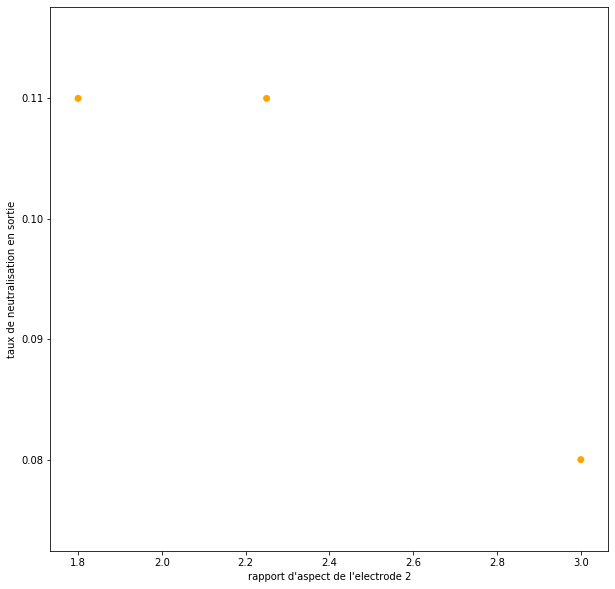

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4], np.array(listes_pf)[:,0], color=liste_couleur)
plt.xlabel("rapport d'aspect de l'electrode 2")
plt.ylabel("taux de neutralisation en sortie")
plt.show()

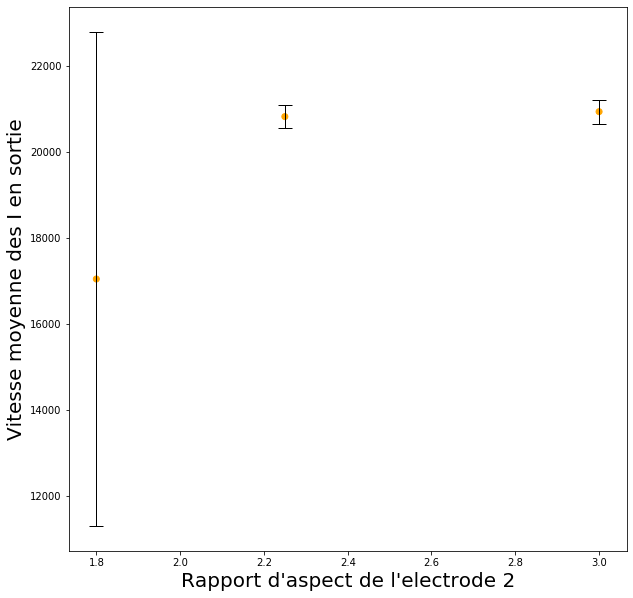

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4],\
            np.array(listes_V)[:,0],\
            color=liste_couleur)
plt.errorbar(np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4],\
             np.array(listes_V)[:,0],\
             yerr=np.array(listes_V_sigma)[:,0],\
             fmt = 'none', capsize = 7,elinewidth=1, ecolor='k')
plt.xlabel("Rapport d'aspect de l'electrode 2",size=20)
plt.ylabel("Vitesse moyenne des I en sortie (m/s)",size=20)
plt.show()

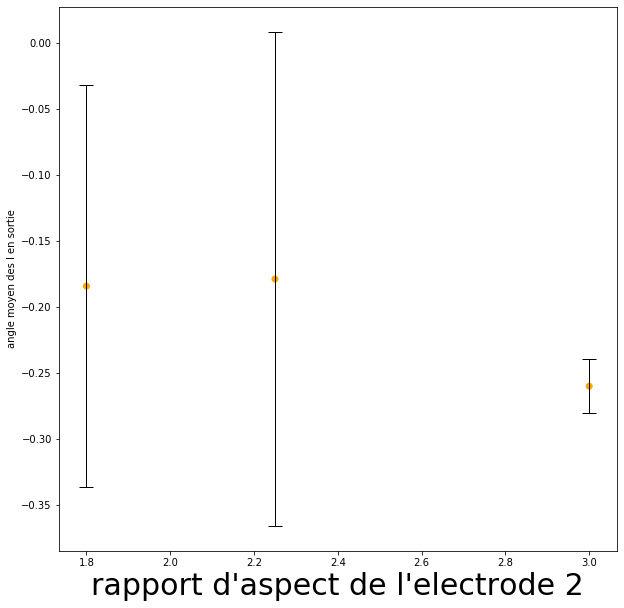

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4],\
            np.array(listes_alpha)[:,0],
            color=liste_couleur)
plt.errorbar(np.array(liste_param_testes)[:,2]/np.array(liste_param_testes)[:,4],\
             np.array(listes_alpha)[:,0],\
             yerr=np.array(listes_alpha_sigma)[:,0],\
             fmt = 'none', capsize = 7,elinewidth=1, ecolor='k')
plt.xlabel("Rapport d'aspect de l'electrode 2",size=20)
plt.ylabel("Angle moyen des I en sortie (rad)",size=20)
plt.show()

In [24]:
"""fig = px.scatter_3d(df, x="rapport1", y="rapport2", z="pf1", color="Phi_electrode_2")# size="___", size_max=10)
fig.update_layout(width=1000, height=700, 
                  scene = dict( xaxis_title="rapport d'aspect de l'electrode 1, longueur/largeur",
                                yaxis_title="rapport d'aspect de l'electrode 2, longueur/largeur",
                                zaxis_title="taux de neutralisation en sortie"),
                   margin=dict(r=0, b=100, l=0, t=100),
                   plot_bgcolor='white')
fig.show()"""

'fig = px.scatter_3d(df, x="rapport1", y="rapport2", z="pf1", color="Phi_electrode_2")# size="___", size_max=10)\nfig.update_layout(width=1000, height=700, \n                  scene = dict( xaxis_title="rapport d\'aspect de l\'electrode 1, longueur/largeur",\n                                yaxis_title="rapport d\'aspect de l\'electrode 2, longueur/largeur",\n                                zaxis_title="taux de neutralisation en sortie"),\n                   margin=dict(r=0, b=100, l=0, t=100),\n                   plot_bgcolor=\'white\')\nfig.show()'

In [30]:
df

,proba,l_1,l_2,L_1,L_2,Phi_electrode_1,Phi_electrode_2,pf1,pf2,pf3,alpha1,alpha2,alpha3,Vnorm1,Vnorm2,Vnorm3,rapport2,rapport1
0,0.1,0.001,0.009,0.0015,0.003,10.0,100.0,0.240000,0.0,0.760000,0.0319374,None,0.195565,11605.1,None,12277.7,3.000000,0.666667
1,0.1,0.001,0.009,0.0015,0.003,10.0,200.0,0.107143,0.0,0.892857,-0.158761,None,-0.13181,17825.9,None,16853.5,3.000000,0.666667
2,0.1,0.001,0.009,0.0015,0.003,10.0,300.0,0.035714,0.0,0.964286,-0.365683,None,0.0286323,21392.6,None,19930.7,3.000000,0.666667
3,0.1,0.001,0.009,0.0015,0.003,10.0,400.0,0.035714,0.0,0.964286,0.496195,None,-0.117451,24317.4,None,23667.1,3.000000,0.666667
4,0.1,0.001,0.009,0.0015,0.003,10.0,500.0,0.137931,0.0,0.862069,-0.059728,None,-0.01258,10926.5,None,27115.4,3.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.1,0.005,0.011,0.0045,0.006,30.0,300.0,0.200000,0.0,0.800000,0.0301663,None,-0.00850451,20528.2,None,21932.6,1.833333,1.111111
121,0.1,0.005,0.011,0.0045,0.007,30.0,300.0,0.250000,0.0,0.750000,-0.0192062,None,-0.0112725,20045.8,None,21693.4,1.571429,1.111111
122,0.1,0.005,0.011,0.0045,0.008,30.0,300.0,0.285714,0.0,0.714286,0.0709973,None,-0.0368171,22024.2,None,22874.2,1.375000,1.111111
123,0.1,0.005,0.011,0.0045,0.009,30.0,300.0,0.538462,0.0,0.461538,0.0551836,None,0.0431583,22480.1,None,22585.8,1.222222,1.111111


# What about $\rho_{elec} \ne 0$ ?

In [35]:
rho_test=1e15*1.6e-19

In [36]:
mesh_dict = { # we need L_mot-L_1 < 2*l_mot !
    'L_mot' : .01,
    'l_mot' : .007,
    'L_1' : .0045,
    'l_1': .005,
    'L_2' : .007,
    'l_2' : .015,
    'delta_vert_12' : .005,
    'L_vacuum' : .1,
    'l_vacuum': .05,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': rho_test,
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,
    'M_NUCLEON':1.7e-27,
}

In [37]:
Phi1, E1 = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
NE1=sqrt(dot(E1,E1))

physics_consts_dict['rhoelec']=0

Phi2, E2 = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
NE2=sqrt(dot(E2,E2))

Calling FFC just-in-time (JIT) compiler, this may take some time.


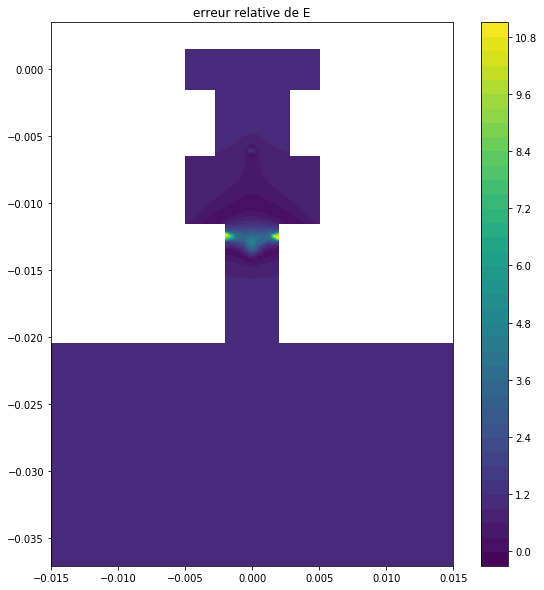

In [39]:
borne_inf_x=-1.5*mesh_dict['L_mot']
borne_sup_x=1.5*mesh_dict['L_mot']
borne_inf_y=-1.3*(.5*mesh_dict['l_mot']+mesh_dict['l_1']+mesh_dict['l_2']+mesh_dict['delta_vert_12'])
borne_sup_y=.5*mesh_dict['l_mot']

plt.figure(figsize=(10,10))
fig=plot(np.max(np.abs(NE1-NE2)/np.abs(NE1)),1)
plt.title('erreur relative de E')
fig.set_cmap("viridis") 
plt.colorbar(fig)
plt.xlim(borne_inf_x,borne_sup_x)
plt.ylim(borne_inf_y,borne_sup_y)
plt.show()
